## Chandan Charchit Sahoo
### 202115118
##### Mtech-AI 

In [1]:
import numpy as np
import pandas as pd

In [21]:
data = [[2,3,1, '+'], [1,2,2, '+'], [2,2,2, '+'],[3,2,2, '+'], [5,3,1, '-'], [6,2,2, '-'], [7,3,1, '-'], [8,2,2, '-']]

In [22]:
df=pd.DataFrame(data, columns=['x','y','z','Class label'])

In [23]:
df

,x,y,z,Class label
0,2,3,1,+
1,1,2,2,+
2,2,2,2,+
3,3,2,2,+
4,5,3,1,-
5,6,2,2,-
6,7,3,1,-
7,8,2,2,-


In [24]:
df['Class label'].replace(['+','-'],[1,0], inplace=True)

In [25]:
df

,x,y,z,Class label
0,2,3,1,1
1,1,2,2,1
2,2,2,2,1
3,3,2,2,1
4,5,3,1,0
5,6,2,2,0
6,7,3,1,0
7,8,2,2,0


In [26]:
X=df.to_numpy()
X

array([[2, 3, 1, 1],
       [1, 2, 2, 1],
       [2, 2, 2, 1],
       [3, 2, 2, 1],
       [5, 3, 1, 0],
       [6, 2, 2, 0],
       [7, 3, 1, 0],
       [8, 2, 2, 0]])

In [31]:
x_ = X[:,:-1]
y_ = X[:,-1]

print(x_.shape,y_.shape)

(8, 3) (8,)


In [34]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
import keras

import matplotlib.pyplot as plt

In [32]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_)

print(X_train)

[[0.14285714 1.         0.        ]
 [0.         0.         1.        ]
 [0.14285714 0.         1.        ]
 [0.28571429 0.         1.        ]
 [0.57142857 1.         0.        ]
 [0.71428571 0.         1.        ]
 [0.85714286 1.         0.        ]
 [1.         0.         1.        ]]


In [35]:
input_layer = layers.Input(shape=(3))
x = layers.Dense(64, activation='relu')(input_layer)
output_layer = layers.Dense(2, activation='sigmoid')(x)

model = keras.Model(input_layer, output_layer)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 130       
Total params: 386
Trainable params: 386
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"],)
 
model_history = model.fit(X_train,y_, epochs= 25)

Epoch 1/25
1/1 [==============================] - 1s 505ms/step - loss: 0.7538 - sparse_categorical_accuracy: 0.5000
Epoch 2/25
1/1 [==============================] - 0s 3ms/step - loss: 0.7488 - sparse_categorical_accuracy: 0.5000
Epoch 3/25
1/1 [==============================] - 0s 3ms/step - loss: 0.7438 - sparse_categorical_accuracy: 0.5000
Epoch 4/25
1/1 [==============================] - 0s 4ms/step - loss: 0.7388 - sparse_categorical_accuracy: 0.5000
Epoch 5/25
1/1 [==============================] - 0s 8ms/step - loss: 0.7339 - sparse_categorical_accuracy: 0.5000
Epoch 6/25
1/1 [==============================] - 0s 4ms/step - loss: 0.7291 - sparse_categorical_accuracy: 0.5000
Epoch 7/25
1/1 [==============================] - 0s 5ms/step - loss: 0.7243 - sparse_categorical_accuracy: 0.5000
Epoch 8/25
1/1 [==============================] - 0s 5ms/step - loss: 0.7195 - sparse_categorical_accuracy: 0.5000
Epoch 9/25
1/1 [==============================] - 0s 4ms/step - loss: 0.7148 -

In [40]:
Y_predict = np.argmax(model.predict(x_), axis=1)
Y_predict

array([1, 1, 1, 1, 0, 0, 0, 0])

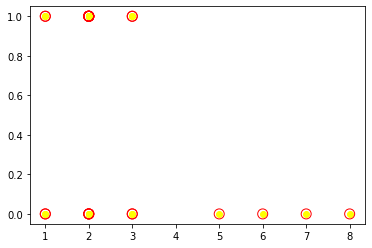

In [42]:
plt.scatter(x_[:,0],y_, color = 'yellow')
plt.scatter(x_[:,1],y_, color = 'yellow')
plt.scatter(x_[:,2],y_, color = 'yellow')


plt.scatter(x_[:,0],Y_predict, s = 100, marker = 'o',facecolors='none', edgecolors='r')
plt.scatter(x_[:,1],Y_predict, s = 100, marker = 'o',facecolors='none', edgecolors='r')
plt.scatter(x_[:,2],Y_predict, s = 100, marker = 'o',facecolors='none', edgecolors='r')

plt.show()